Heap Data Structure Implementation

There are many types of heaps but as the most commonly used is binary heaps we will focus on this.

Other heaps include: 2-3 heap, Fibonacci heap, Skew heap and many more. 

The Binary Heap. 

Typical uses for a heap is returning the minimum or maximum value from a list of tasks or items, this is optimized for returning the highest priority element, which is either the min or max depending on the implementation.

For a binary tree implementation of a heap the following property must be respected: 
All children of a given node must be less than or equal to the value of the parent node. 

Once a heap has been created it can be easily stored in an array with the following property: 
- for a given node at position i, its children can be found at 2i + 1 and 2i + 2 for the left and right respectively. 
- for a given node at position i, its parent can be found at (i-1)/2. 

Required Operations for a Heap: 
1. insert element
2. peek min/max
3. pop min/max
4. update value
5. build a heap

when adding and removing from the heap we need 2 functions to insure that the heap property is respected. these are swimUp and swimDown.

Swim Up

This operation checks if the current value is less than the parent. in the case of a min heap this violates the heap property and the parent and node will be swapped. 

![Screenshot 2024-08-10 at 17.55.05.png](<attachment:Screenshot 2024-08-10 at 17.55.05.png>)
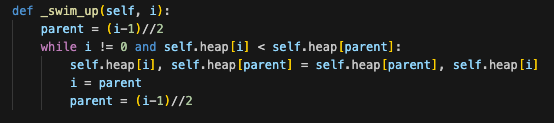

Swim Down 

This operation check the current nodes children and if smaller it swaps with the smallest of the children for the min heap implementation.

![Screenshot 2024-08-10 at 18.00.56.png](<attachment:Screenshot 2024-08-10 at 18.00.56.png>)
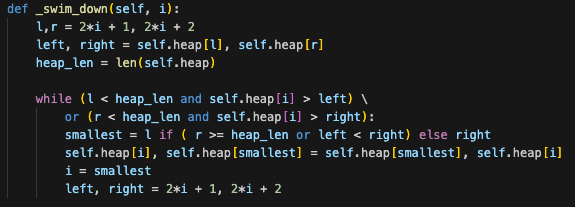

In both cases, the time complexeity is linked to the height of the tree. As a binary tree is balanced and is a complete tree, the height will be O( log n). 

These operations are needed to insure the heap property is preserved when adding or removing elements from a heap. 

Inserting into a Heap (heap push)

This uses the swim up operation and is therefore an O( log n) time complexeity operation.

![Screenshot 2024-08-10 at 18.13.11.png](<attachment:Screenshot 2024-08-10 at 18.13.11.png>)
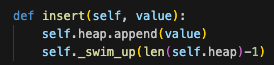

Popping from the Heap (heap pop)

This first swaps the top root with the most recent leaf node and then pops from the heap. 
After this we need to run swim down to preserve the heap property. 

![Screenshot 2024-08-10 at 18.13.50.png](<attachment:Screenshot 2024-08-10 at 18.13.50.png>)
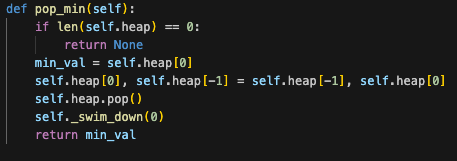

Updating a node. 

Uses the swim up and down depending on the new updated value. 

If new value is smaller than the parent then swim up. 

If new value is larger than then parent then swim down. 

The code for updating will depend on whether or not we know the index of the value we are wanting to update

![Screenshot 2024-08-10 at 18.19.05.png](<attachment:Screenshot 2024-08-10 at 18.19.05.png>)
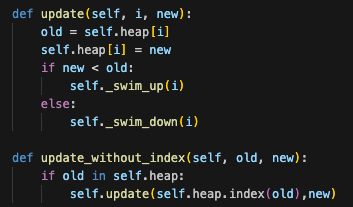

Build the Heap (heapify)

To avoid additional operations it is best to do this using swim down as the bottom levels have more nodes ~ n/2. 

To obtain the time complexeity we use the following equation.

![Screenshot 2024-08-10 at 18.45.38.png](<attachment:Screenshot 2024-08-10 at 18.45.38.png>)
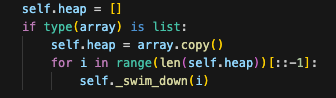

O(n) = 0 * n/2 + 1 * n/4 + 2 * n/8 + 3 * n/16 + ... + ((log n - 1)*1)

![Screenshot 2024-08-10 at 18.41.35.png](<attachment:Screenshot 2024-08-10 at 18.41.35.png>)
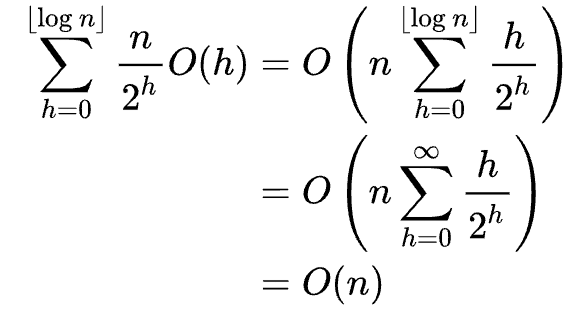

The time complexeity is therefore O(n). 

Using Swim up would be O(n log n)

Implementation of a min heap. (max heap is almost identical)

In [4]:
class MinBinaryHeap():
    
    def __init__(self, array=None):
        self.heap = []
        if type(array) is list: 
            self.heap = array.copy()
            for i in range(len(self.heap))[::-1]:
                self._swim_down(i)
    
    def _swim_up(self, i):
        parent = (i-1)//2
        while i != 0 and self.heap[i] < self.heap[parent]: 
            self.heap[i], self.heap[parent] = self.heap[parent], self.heap[i]
            i = parent
            parent = (i-1)//2 
    
    def _swim_down(self, i):
        l,r = 2*i + 1, 2*i + 2 
        left, right = self.heap[l], self.heap[r]
        heap_len = len(self.heap)

        while (l < heap_len and self.heap[i] > left) \
            or (r < heap_len and self.heap[i] > right): 
            smallest = l if ( r >= heap_len or left < right) else right
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]
            i = smallest
            left, right = 2*i + 1, 2*i + 2 

    def insert(self, value): 
        self.heap.append(value)
        self._swim_up(len(self.heap)-1)
    
    def pop_min(self): 
        if len(self.heap) == 0: 
            return None
        min_val = self.heap[0]
        self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
        self.heap.pop()
        self._swim_down(0)
        return min_val

    def update(self, i, new): 
        old = self.heap[i]
        self.heap[i] = new
        if new < old: 
            self._swim_up(i)
        else: 
            self._swim_down(i)

    def update_without_index(self, old, new): 
        if old in self.heap: 
            self.update(self.heap.index(old),new)





Applications of Heaps: 
- heapsort
- priority queues

Heap Sort

O( n log n)

In [5]:
def heapsort(array): 
    heap = MinBinaryHeap(array)
    return [heap.pop_min() for i in range(len(heap.heap))]

Priority Queue

elements have a priority and we always want to extract the highest priority first.

The priority queue will be a min heap and max heap

Operations of a priority queue: 
- enqueue O( log n)
- dequeue O( log n)
- peek O(1)
- change priority O(log n) or O(n)
- is empty O(1)

In [7]:
class PriorityQueue: 
    
    def __init__(self):
        self.queue = MinBinaryHeap()
    
    def enqueue(self, element):
        self.queue.insert(element)

    def peek(self): 
        return self.queue[0]
    
    def dequeue(self): 
        return self.queue.pop_min()
    
    def change_priority_by_index(self, i, new): 
        self.queue.update(i,new)

    def change_priority(self, old, new): 
        self.queue.update(old, new)

    def is_empty(self): 
        return len(self.queue.heap) == 0
    